In [7]:
import pandas as pd 
import numpy as np 
import os
import warnings
warnings.filterwarnings('ignore')



In [8]:

for i in range(2018, 2024):
    dir_path = fr"C:\Users\rishi\ml_projects\climate\{i}_data\NTL"
    filenames = os.listdir(dir_path)

    month_mapping = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }

    # Sort the filenames based on the month extracted from the filename
    sorted_filenames = sorted(filenames, key=lambda x: month_mapping[x.split('_')[0]])
    for filename in sorted_filenames:
        filepath = os.path.join(dir_path, filename)
        df = pd.read_csv(filepath, index_col=0)
        count=0
        for index,row in df.iterrows():
            for x in range(len(row)):
                if(row[x]==0):
                    count+=1
        if(count>=df.shape[0]*df.shape[1]/3):
            print(f"year: {i} , month :{filename}")


year: 2019 , month :July_NTL.csv
year: 2019 , month :September_NTL.csv
year: 2022 , month :July_NTL.csv
year: 2023 , month :July_NTL.csv
year: 2023 , month :September_NTL.csv


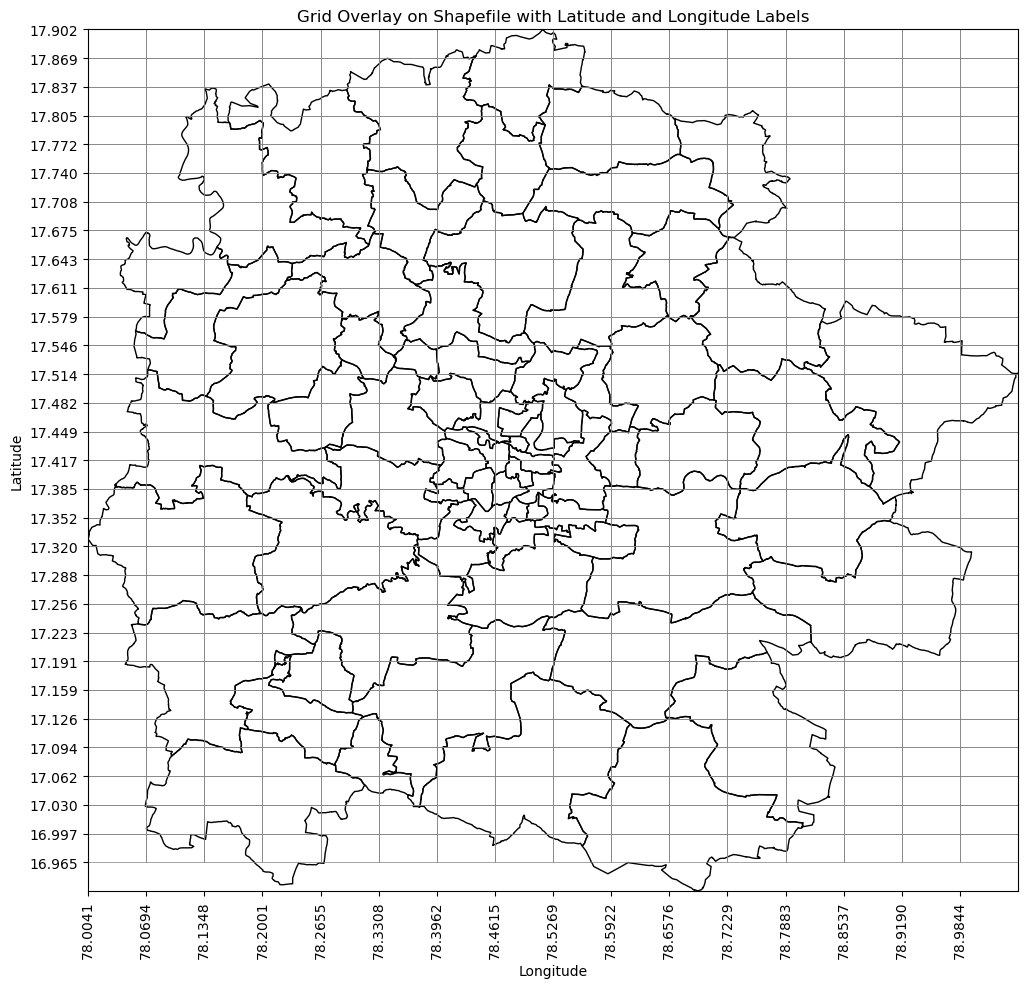

In [12]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

# Load the GeoTIFF file
tiff_path = r'C:\Users\rishi\ml_projects\climate\Notebooks\data\CO\c9c65b1d28d057a64b4744bb7664f861\response.tiff'
with rasterio.open(tiff_path) as src:
    bounds = src.bounds
    width = src.width
    height = src.height
    transform = src.transform

# Load the shapefile
shapefile_path = r'C:\Users\rishi\ml_projects\climate\hmda_boundary\hmda_boundary.shp'
shape_data = gpd.read_file(shapefile_path)

fig, ax = plt.subplots(figsize=(12, 12))

# Plot the shapefile
shape_data.plot(ax=ax, color='none', edgecolor='black')

# Create the grid and add labels
rows, cols = height, width
lat_labels = []
lon_labels = []

for row in range(rows):
    for col in range(cols):
        x = transform[2] + col * transform[0]
        y = transform[5] + row * transform[4]
        rect = Rectangle((x, y), transform[0], -transform[4], fill=False, edgecolor='gray', linewidth=0.5)
        ax.add_patch(rect)

        # Collect the labels for longitude and latitude
        if row == 0:  # Add longitude labels at the top edge
            lon_labels.append(x)
        if col == 0:  # Add latitude labels at the left edge
            lat_labels.append(y)

# Set plot limits
ax.set_xlim(bounds.left, bounds.right)
ax.set_ylim(bounds.bottom, bounds.top)

# Set labels on the axes
ax.set_xticks(lon_labels)
ax.set_xticklabels([f'{lon:.4f}' for lon in lon_labels], rotation=90)
ax.set_yticks(lat_labels)
ax.set_yticklabels([f'{lat:.3f}' for lat in lat_labels])

# Set equal aspect ratio
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Grid Overlay on Shapefile with Latitude and Longitude Labels')

plt.show()


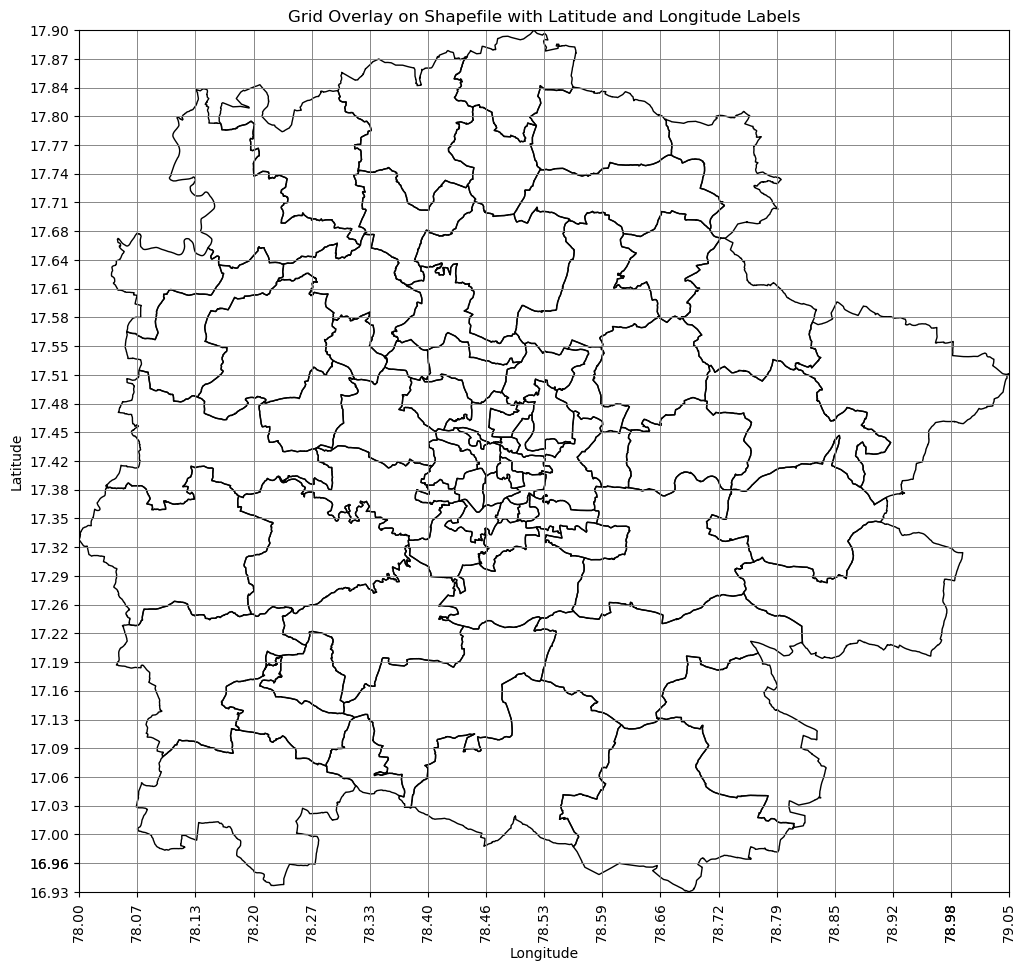

In [15]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

# Load the GeoTIFF file
#tiff_path = 'your_geotiff_file.tif'
with rasterio.open(tiff_path) as src:
    bounds = src.bounds
    width = src.width
    height = src.height
    transform = src.transform

# Load the shapefile
#shapefile_path = 'your_shapefile.shp'
shape_data = gpd.read_file(shapefile_path)

fig, ax = plt.subplots(figsize=(12, 12))

# Plot the shapefile
shape_data.plot(ax=ax, color='none', edgecolor='black')

# Create the grid and add labels
rows, cols = height, width
lat_labels = []
lon_labels = []

for row in range(rows+1):
    for col in range(cols+1):
        x = transform[2] + col * transform[0]
        y = transform[5] + row * transform[4]
        rect = Rectangle((x, y), transform[0], -transform[4], fill=False, edgecolor='gray', linewidth=0.5)
        ax.add_patch(rect)

        # Collect the labels for longitude and latitude
        if row == 0:  # Add longitude labels at the top edge
            lon_labels.append(x)
        if col == 0:  # Add latitude labels at the left edge
            lat_labels.append(y)

# Ensure the bottom row's latitude label is included
# Adding the latitude label for the last row explicitly
last_lat = transform[5] + (rows - 1) * transform[4]
lat_labels.append(last_lat)

# Ensure the rightmost longitude label is included
# Adding the longitude label for the last column explicitly
last_lon = transform[2] + (cols - 1) * transform[0]
lon_labels.append(last_lon)

# Set plot limits
ax.set_xlim(bounds.left, bounds.right)
ax.set_ylim(bounds.bottom, bounds.top)

# Set labels on the axes
ax.set_xticks(lon_labels)
ax.set_xticklabels([f'{lon:.2f}' for lon in lon_labels], rotation=90)
ax.set_yticks(lat_labels)
ax.set_yticklabels([f'{lat:.2f}' for lat in lat_labels])

# Set equal aspect ratio
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Grid Overlay on Shapefile with Latitude and Longitude Labels')

plt.show()
